# Regression 

## Start learning regression algorithm

### predict the feature from history and predict the number

In [10]:
#pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd

In [20]:
df = pd.read_excel('cars.xls')

## EDA - exploratory data analysis

In [23]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,aa
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,True
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,False
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,True
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,False
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,True


In [5]:
df.shape # row and column

(804, 13)

In [6]:
df.sample(10)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,aa
291,12810.910585,19461,Chevrolet,Cobalt,Coupe 2D,Coupe,4,2.2,2,1,1,1,False
400,19164.610627,1480,Chevrolet,Malibu,LS Sedan 4D,Sedan,6,3.5,4,1,1,1,True
456,16357.992322,23491,Chevrolet,Monte Carlo,LS Coupe 2D,Coupe,6,3.8,2,1,1,0,True
36,21341.257207,25212,Buick,Lacrosse,CXS Sedan 4D,Sedan,6,3.8,4,1,1,1,True
798,16425.174796,14242,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0,True
559,14963.045619,31471,Pontiac,Grand Prix,GT Sedan 4D,Sedan,6,3.8,4,1,1,0,False
6,15230.003390,22576,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,True
235,12630.775034,22571,Chevrolet,Cavalier,LS Coupe 2D,Coupe,4,2.2,2,1,1,1,False
755,13869.154942,24349,Saturn,Ion,Quad Coupe 2D,Coupe,4,2.2,2,1,1,0,False
319,12741.190233,34815,Chevrolet,Cobalt,LS Sedan 4D,Sedan,4,2.2,4,0,1,1,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
 12  aa        804 non-null    bool   
dtypes: bool(1), float64(2), int64(6), object(4)
memory usage: 76.3+ KB


In [8]:
df.describe() # statistic

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [9]:
df.corr(numeric_only=True)

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,aa
Price,1.000000,-0.143051,5.690861e-01,5.581458e-01,-1.387497e-01,0.430851,-0.124348,0.157197,2.495510e-02
Mileage,-0.143051,1.000000,-2.946099e-02,-1.864062e-02,-1.694449e-02,0.025037,-0.026146,0.001005,-1.724725e-01
Cylinder,0.569086,-0.029461,1.000000e+00,9.578966e-01,2.205920e-03,0.354285,-0.089704,0.075520,-1.743684e-16
Liter,0.558146,-0.018641,9.578966e-01,1.000000e+00,-7.925909e-02,0.377509,-0.065527,0.087332,-1.284875e-16
Doors,-0.138750,-0.016944,2.205920e-03,-7.925909e-02,1.000000e+00,-0.047674,-0.062530,-0.061969,-1.278256e-16
Cruise,0.430851,0.025037,3.542848e-01,3.775093e-01,-4.767418e-02,1.000000,-0.091730,-0.070573,3.746616e-02
Sound,-0.124348,-0.026146,-8.970430e-02,-6.552707e-02,-6.253031e-02,-0.091730,1.000000,0.165444,2.664366e-02
Leather,0.157197,0.001005,7.551962e-02,8.733194e-02,-6.196858e-02,-0.070573,0.165444,1.000000,-5.007656e-02
aa,0.024955,-0.172472,-1.743684e-16,-1.284875e-16,-1.278256e-16,0.037466,0.026644,-0.050077,1.000000e+00


In [10]:
import seaborn as sns

<Axes: >

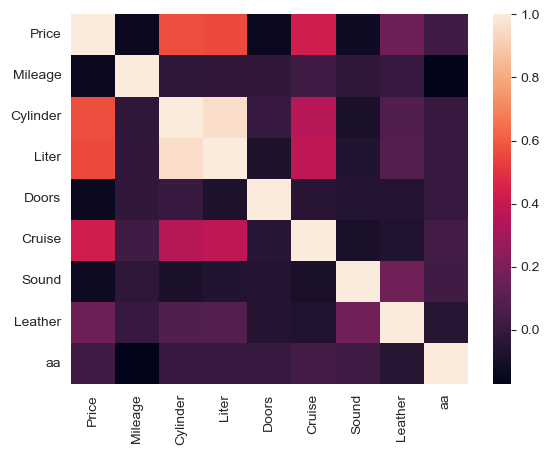

In [11]:
sns.heatmap(df.corr(numeric_only=True))

### outlier : ortalama +-3 * standart sampa

In [12]:
df.Price.mean(), df.Price.median(), df.Price.std(), df.Price.min(), df.Price.max()

(21343.143767325837,
 18024.995019071903,
 9884.852800898007,
 8638.930895260657,
 70755.46671654288)

In [13]:
df.tail()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,aa
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0,False
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,True
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,False
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,True
803,13585.636802,35662,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0,False


In [14]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
aa          0
dtype: int64

In [15]:
df.Make.unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [16]:
df.Make.nunique()

6

In [17]:
df.Make.value_counts(), df.Make.value_counts(normalize=True)

(Make
 Chevrolet    320
 Pontiac      150
 SAAB         114
 Buick         80
 Cadillac      80
 Saturn        60
 Name: count, dtype: int64,
 Make
 Chevrolet    0.398010
 Pontiac      0.186567
 SAAB         0.141791
 Buick        0.099502
 Cadillac     0.099502
 Saturn       0.074627
 Name: proportion, dtype: float64)

[Text(0, 0, '80'),
 Text(0, 0, '80'),
 Text(0, 0, '320'),
 Text(0, 0, '150'),
 Text(0, 0, '114'),
 Text(0, 0, '60')]

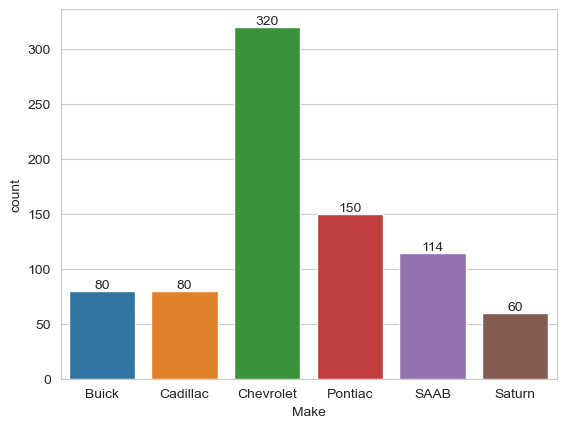

In [18]:
ax = sns.countplot(x=df.Make)
ax.bar_label(ax.containers[0])

[Text(0, 0, '394'), Text(0, 0, '310'), Text(0, 0, '100')]

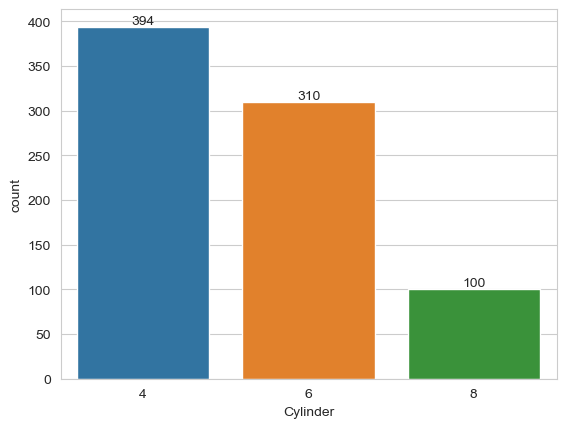

In [19]:
ax = sns.countplot(x=df.Cylinder)
ax.bar_label(ax.containers[0])

[Text(0, 0, '190'), Text(0, 0, '614')]

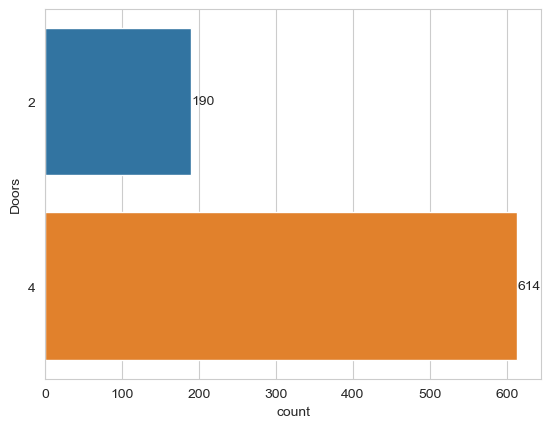

In [20]:
ax = sns.countplot(y=df.Doors)
ax.bar_label(ax.containers[0])

In [21]:
#sns.pairplot(df, hue='Make')

<Axes: xlabel='Price', ylabel='Mileage'>

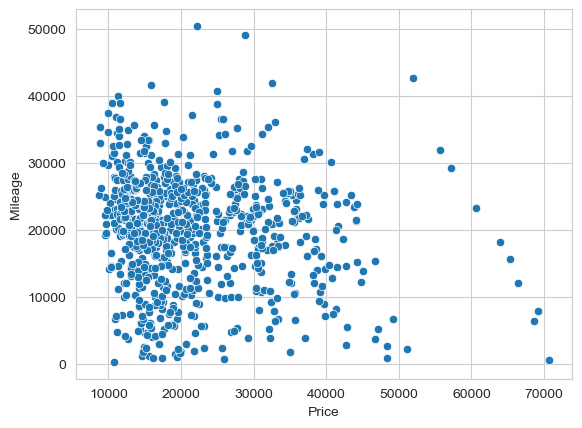

In [22]:
sns.scatterplot(x='Price', y = 'Mileage', data=df)

<Axes: xlabel='Price', ylabel='Mileage'>

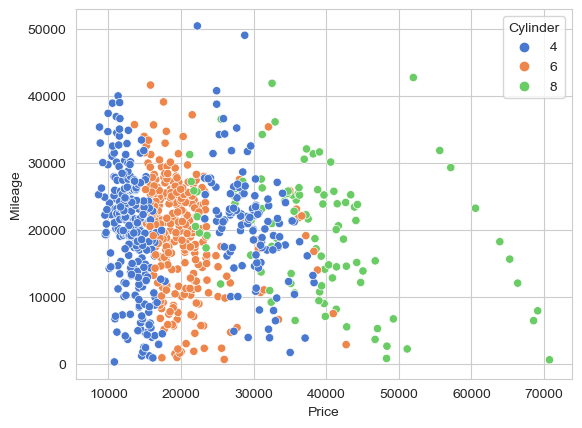

In [23]:
sns.scatterplot(x='Price', y = 'Mileage', hue='Cylinder', palette='muted', data=df)

## p-value (Calculated Probability)

In [24]:
# Hypothesis test
# H0: Price and Mileage are not related
# H1: Price and Mileage are related

# p-value: This is the probability that the null hypothesis is true.
# p-value < 0.05 => H0 reject
# p-value > 0.05 => H0 fail to reject

from scipy.stats import ttest_ind

In [25]:
t,p=ttest_ind(df.Price, df.Mileage)
p

0.0008662338227446262

### Result:
* p = 0.0008662338227446262
* p is less than 0.05, so we reject the null hypothesis
* Price and Mileage are related

/home/cevheri/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


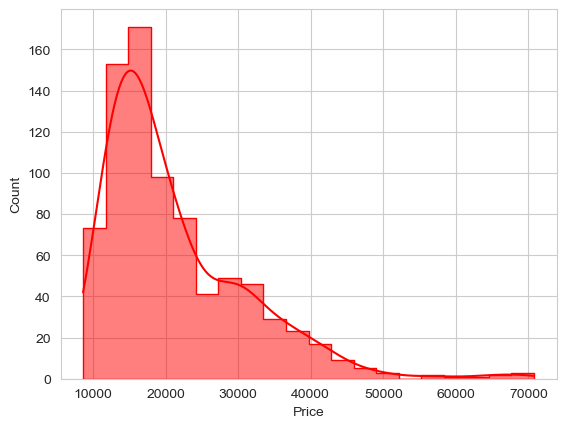

In [33]:
sns.histplot(x='Price', data=df, kde=True, bins=20, color='red', alpha=0.5, label='Price', element='step');

/home/cevheri/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


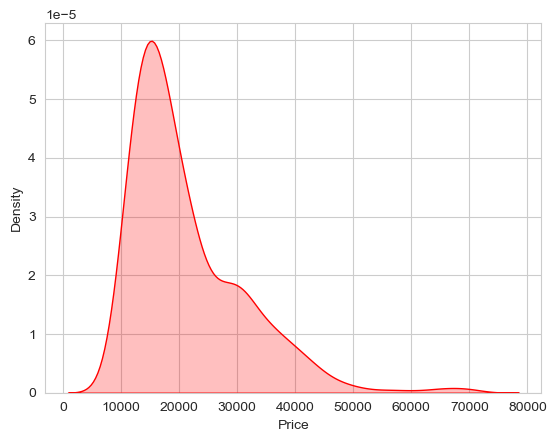

In [35]:
sns.kdeplot(x='Price', data=df, color='red', label='Price', fill=True);

/home/cevheri/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


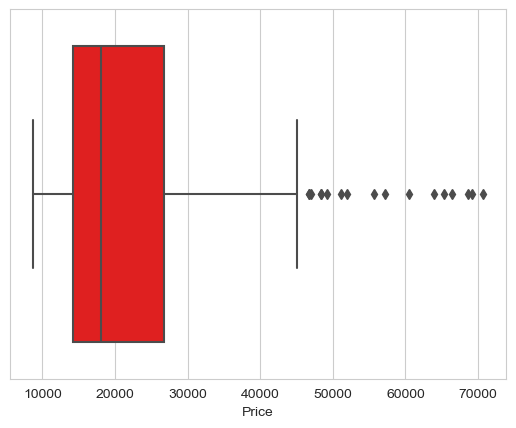

In [40]:
sns.boxplot(x='Price', data=df, color='red', orient='v');

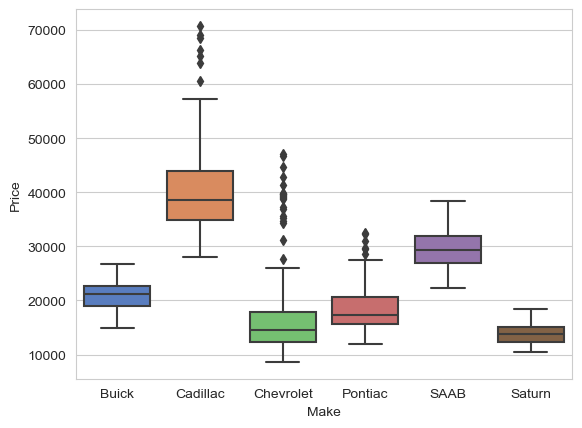

In [44]:
(sns.boxplot(x='Make', y='Price', data=df, palette='muted'));


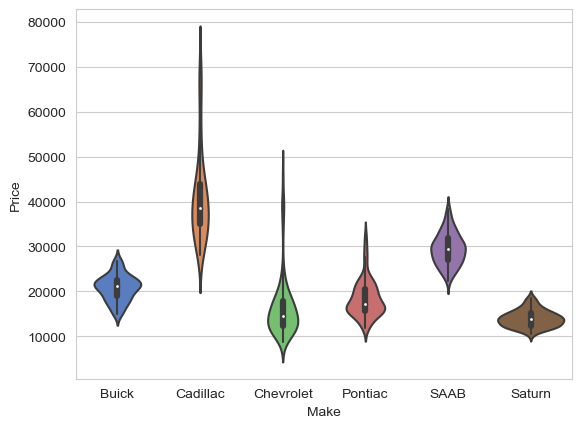

In [43]:
sns.violinplot(x='Make', y='Price', data=df, palette='muted');

In [45]:
import plotly.express as px

In [47]:
px.bar(df, x='Make', y='Price', color='Make')

In [48]:
px.scatter_3d(df, x='Price', y='Mileage', z='Cylinder', color='Make')

In [51]:
px.sunburst(df, path=['Make', 'Model', 'Trim'], values='Price')

## Future Engineering

In [52]:
df.corr(numeric_only=True)

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,aa
Price,1.000000,-0.143051,5.690861e-01,5.581458e-01,-1.387497e-01,0.430851,-0.124348,0.157197,2.495510e-02
Mileage,-0.143051,1.000000,-2.946099e-02,-1.864062e-02,-1.694449e-02,0.025037,-0.026146,0.001005,-1.724725e-01
Cylinder,0.569086,-0.029461,1.000000e+00,9.578966e-01,2.205920e-03,0.354285,-0.089704,0.075520,-1.743684e-16
Liter,0.558146,-0.018641,9.578966e-01,1.000000e+00,-7.925909e-02,0.377509,-0.065527,0.087332,-1.284875e-16
Doors,-0.138750,-0.016944,2.205920e-03,-7.925909e-02,1.000000e+00,-0.047674,-0.062530,-0.061969,-1.278256e-16
Cruise,0.430851,0.025037,3.542848e-01,3.775093e-01,-4.767418e-02,1.000000,-0.091730,-0.070573,3.746616e-02
Sound,-0.124348,-0.026146,-8.970430e-02,-6.552707e-02,-6.253031e-02,-0.091730,1.000000,0.165444,2.664366e-02
Leather,0.157197,0.001005,7.551962e-02,8.733194e-02,-6.196858e-02,-0.070573,0.165444,1.000000,-5.007656e-02
aa,0.024955,-0.172472,-1.743684e-16,-1.284875e-16,-1.278256e-16,0.037466,0.026644,-0.050077,1.000000e+00


In [53]:
df.corr(numeric_only=True).Price.sort_values(ascending=False)

Price       1.000000
Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Leather     0.157197
aa          0.024955
Sound      -0.124348
Doors      -0.138750
Mileage    -0.143051
Name: Price, dtype: float64

In [54]:
abs(df.corr(numeric_only=True).Price).sort_values(ascending=False)

Price       1.000000
Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Leather     0.157197
Mileage     0.143051
Doors       0.138750
Sound       0.124348
aa          0.024955
Name: Price, dtype: float64

In [60]:
x = df[['Mileage','Cylinder', 'Liter', 'Cruise']]
y = df[['Price']]

x, y

(     Mileage  Cylinder  Liter  Cruise
 0       8221         6    3.1       1
 1       9135         6    3.1       1
 2      13196         6    3.1       1
 3      16342         6    3.1       1
 4      19832         6    3.1       1
 ..       ...       ...    ...     ...
 799    16229         6    3.0       1
 800    19095         6    3.0       1
 801    20484         6    3.0       1
 802    25979         6    3.0       1
 803    35662         6    3.0       1
 
 [804 rows x 4 columns],
             Price
 0    17314.103129
 1    17542.036083
 2    16218.847862
 3    16336.913140
 4    16339.170324
 ..            ...
 799  16507.070267
 800  16175.957604
 801  15731.132897
 802  15118.893228
 803  13585.636802
 
 [804 rows x 1 columns])

In [61]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# the hitchhiker's guide to the galaxy :) 

In [67]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((643, 4), (161, 4), (643, 1), (161, 1))

### Modelling

In [4]:
from sklearn.linear_model import LinearRegression # y = ax + b

In [6]:
lr = LinearRegression()

### Training

In [81]:
model = lr.fit(x_train, y_train)

In [100]:
pred = model.predict(x_test)

In [8]:
from sklearn.metrics import r2_score, mean_squared_error

### Evaluation

2 ^0.5 

In [102]:
25**0.5

5.0

In [103]:
mean_squared_error(y_test, pred)**0.5

7413.255792158801

In [104]:
r2_score(y_test, pred)

0.30711149069980015

In [105]:
# Label Encoding

In [106]:
df.Make.unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [107]:
#Sparse Matrix

In [108]:
x = df[['Mileage','Cylinder', 'Liter', 'Cruise', 'Make', 'Model', 'Trim']]
y = df[['Price']]

In [136]:
x, y 

(     Mileage  Cylinder  Liter  Cruise  Make_Cadillac  Make_Chevrolet  \
 0       8221         6    3.1       1          False           False   
 1       9135         6    3.1       1          False           False   
 2      13196         6    3.1       1          False           False   
 3      16342         6    3.1       1          False           False   
 4      19832         6    3.1       1          False           False   
 ..       ...       ...    ...     ...            ...             ...   
 799    16229         6    3.0       1          False           False   
 800    19095         6    3.0       1          False           False   
 801    20484         6    3.0       1          False           False   
 802    25979         6    3.0       1          False           False   
 803    35662         6    3.0       1          False           False   
 
      Make_Pontiac  Make_SAAB  Make_Saturn  Model_9_3  ...  Trim_Quad Coupe 2D  \
 0           False      False        Fal

In [110]:
# Make, Model, Trim => Label Encoding

In [111]:
x = pd.get_dummies(x, columns=['Make', 'Model', 'Trim'], drop_first=True)
x

,Mileage,Cylinder,Liter,Cruise,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9_3,...,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D
0,8221,6,3.1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,9135,6,3.1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,13196,6,3.1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,16342,6,3.1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,19832,6,3.1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16229,6,3.0,1,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
800,19095,6,3.0,1,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
801,20484,6,3.0,1,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
802,25979,6,3.0,1,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [117]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = lr.fit(x_train, y_train)
pred = model.predict(x_test)
mean_squared_error(y_test, pred)**0.5 # Root Mean Squared Error


835.9899877493751

In [118]:
r2_score(y_test, pred)

0.9911885467725899

In [ ]:
# Result:
# Before Label Encoding:
# rmse:  835
# R2 Score:  0.99


In [119]:
# pd.set_option('display.max_columns', 100) # show all columns


## New Models

In [2]:
# from sklearn.ensemble import Ridge, Lasso, RandomForestRegressor

ImportError: cannot import name 'Ridge' from 'sklearn.ensemble' (/home/cevheri/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/__init__.py)

In [121]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [123]:
R = Ridge()
L = Lasso()
E = ElasticNet()

#### Ridge

In [130]:
r_model = R.fit(x_train, y_train)
r_pred = r_model.predict(x_test)
mean_squared_error(y_test, r_pred)**0.5 , r2_score(y_test, r_pred)

(914.9047468899936, 0.9894464845619059)

#### Lasso

In [131]:
l_model = L.fit(x_train, y_train)
l_pred = L.predict(x_test)
mean_squared_error(y_test, l_pred)**0.5 , r2_score(y_test, l_pred)

/home/cevheri/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.458e+08, tolerance: 6.560e+06



(829.3760808665579, 0.9913274182884081)

#### ElasticNet

In [133]:
e_model = E.fit(x_train, y_train)
e_pred = E.predict(x_test)
mean_squared_error(y_test, e_pred)**0.5 , r2_score(y_test, e_pred)

(5671.881248369612, 0.5943984117147725)

### create a function for the model

In [134]:
def model(x, y, model):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    model = model.fit(x_train, y_train)
    pred = model.predict(x_test)
    return mean_squared_error(y_test, pred)**0.5, r2_score(y_test, pred)

In [135]:
model(x, y, LinearRegression())

(835.9899877493751, 0.9911885467725899)

In [137]:
model(x, y, Ridge())

(914.9047468899936, 0.9894464845619059)

In [138]:
model(x, y, Lasso())

/home/cevheri/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.458e+08, tolerance: 6.560e+06



(829.3760808665579, 0.9913274182884081)

In [139]:
model(x, y, ElasticNet())

(5671.881248369612, 0.5943984117147725)

In [ ]:
### coefficient

In [140]:
lr.coef_

array([[-1.87571841e-01,  1.36860561e+03,  3.08314289e+03,
         7.84875187e+01,  1.15176391e+04, -2.48135940e+03,
        -2.89930092e+03,  6.36955149e+03, -2.10392446e+03,
         4.12852724e+03,  6.05231464e+03,  6.63055612e+03,
         7.21257302e+03, -7.45789358e+02, -3.13507284e+03,
         1.85966337e+03, -1.27472619e+03, -3.00730126e+02,
        -4.73165605e+03,  1.22437809e+03,  6.90594323e+02,
         6.35817207e+03, -6.59630401e+03,  2.54379654e+02,
         9.14792713e+02, -1.21055437e+03, -3.26414168e+03,
        -2.70201960e+03,  1.07784144e+02, -2.21170860e+03,
        -2.48153670e+03, -3.44518392e+03, -3.09949698e+03,
        -3.90646783e+03,  2.55770818e+02,  3.88996075e+03,
         3.23561220e+03,  3.20892578e+02,  3.22040303e+03,
         1.04034330e+04,  3.05921890e+03, -3.43187911e+03,
        -2.01040581e+03,  6.14896102e+03, -7.46102144e+02,
        -1.46134873e+01, -1.94969865e+03, -6.29582087e+02,
         9.77440325e+01,  2.89107027e+03, -2.24546993e+0

In [147]:
feature_importance = pd.DataFrame({'feature': x_train.columns, 'Coefs': lr.coef_[0]})

In [151]:
feature_importance = feature_importance.sort_values(by='Coefs', ascending=False)

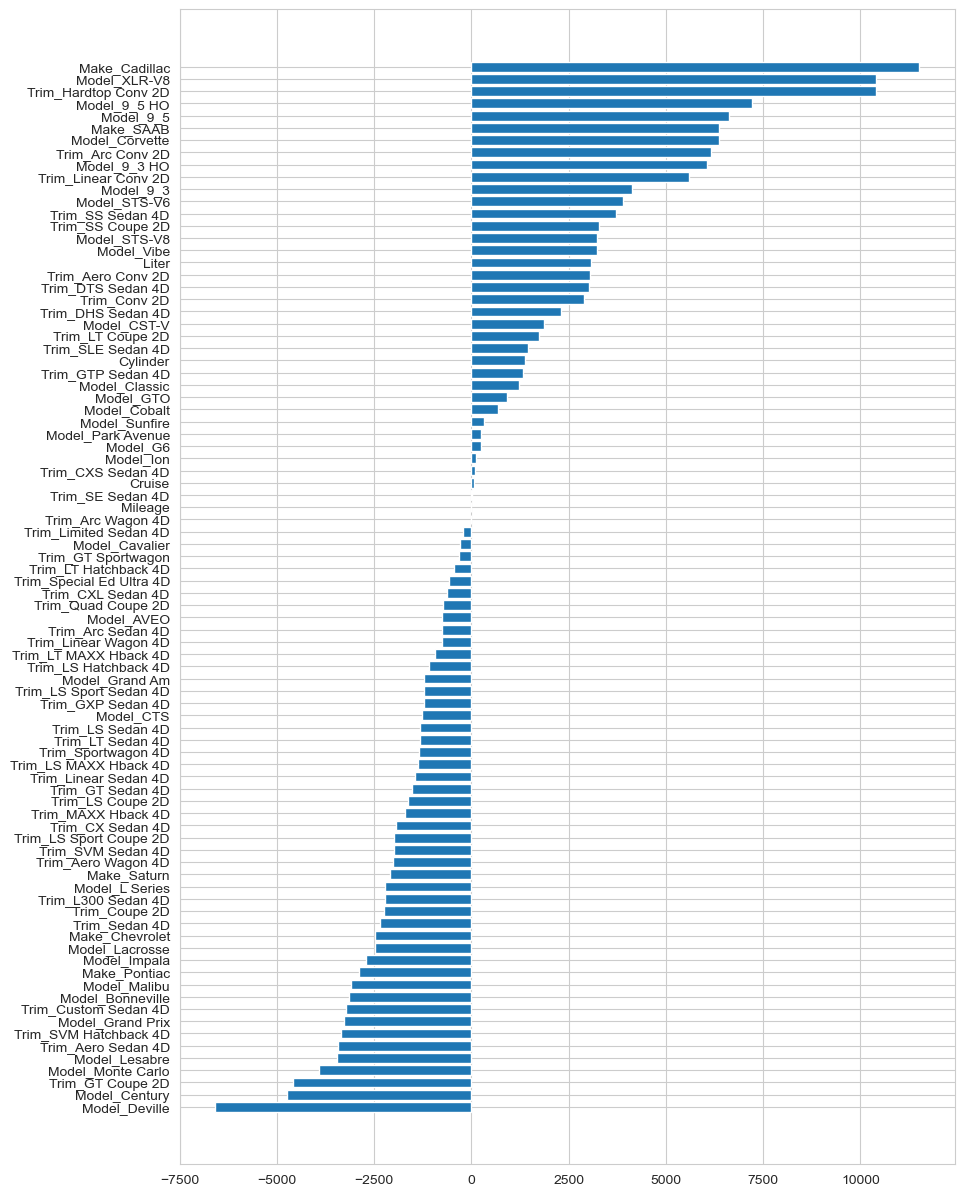

In [152]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 15))
plt.barh(feature_importance.feature, feature_importance.Coefs)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
## Regression importances notes:
# 1. r2 > 0.85
# 2. rmse < 1000
# 2.1 Residuals should be normally distributed

In [154]:
residuals = pred - y_test
residuals

,Price
192,628.669462
717,474.519691
168,-1097.670352
522,129.048811
536,-274.308031
...,...
658,948.030491
356,144.782474
525,795.292375
748,780.388924


/home/cevheri/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



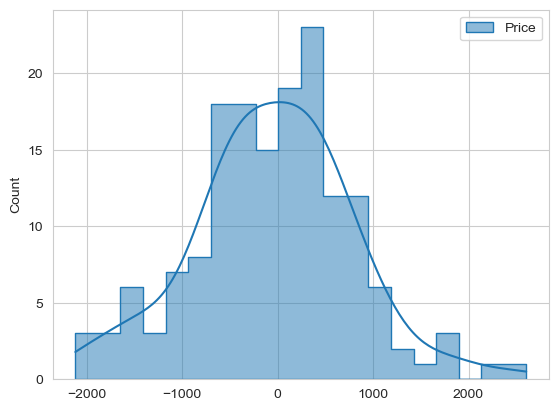

In [155]:
sns.histplot(residuals, kde=True, bins=20, color='red', alpha=0.5, label='Residuals', element='step');